## Imports

In [1]:
import numpy as np
import scanpy as sc
import os
import pandas as pd
import bbknn

## Single Cell settings

In [2]:
sc.settings.verbosity = 4
sc.settings.set_figure_params(80) 
sc.settings.file_format_figures = 'png'
sc.settings.savefigs = False
use_first_n_samples = 0
full_sparse = False

C:\Users\TzachiHNB2\AppData\Local\Temp\ipykernel_19252\738880785.py:2: FutureWarning: The specified parameters ('scanpy',) are no longer positional. Please specify them like `scanpy=80`
  sc.settings.set_figure_params(80)


## Defining a function for processing the data & determing the parameters

In [3]:
def processing_batch(adata, neighbors=15, key='batch', reso=0.4, random_state=0):  # Higher resolution yields more leiden clusters 
    sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver='arpack')
    sc.logging.print_memory_usage()
    sc.pp.neighbors(adata, n_neighbors=neighbors)
    sc.pl.pca_variance_ratio(adata, log=True)
    bbknn.bbknn(adata, batch_key=key, neighbors_within_batch=2, metric='euclidean', n_pcs=30, trim=None)
    sc.tl.umap(adata)
    sc.tl.leiden(adata, resolution=reso)
    sc.pl.umap(adata, color='leiden')

## Reading the h5ad file 

In [5]:
adata = sc.read(r'/Code/data/single_cell/animals/turtle/turtle_1_and_3/''turtles.h5ad') 

sc.read_h5ad(r'/Code/data/single_cell/animals/turtle/turtle_1_and_3/''turtles.h5ad')

AnnData object with n_obs × n_vars = 26575 × 22456
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'treatment', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'S_score', 'G2M_score', 'phase', 'sample', 'cca_clusters', 'seurat_clusters', 'ident'
    var: 'gene_ids', 'feature_types', 'protein_id', 'eggnog_name', 'MT', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name'
    obsm: 'INTEGRATED.CCA', 'PCA', 'UMAP.CCA'
    layers: 'logcounts'

In [6]:
adata.var

gene_ids    feature_types      protein_id eggnog_name  \
TYMP                  TYMP  Gene Expression  XP_034618943.1        TYMP   
LOC117873559  LOC117873559  Gene Expression  XP_034618957.1        SCO2   
NCAPH2              NCAPH2  Gene Expression  XP_034618969.1      NCAPH2   
LMF2                  LMF2  Gene Expression  XP_034618983.1        LMF2   
MIOX                  MIOX  Gene Expression  XP_034618997.1        MIOX   
...                    ...              ...             ...         ...   
ND4L                  ND4L  Gene Expression  YP_002317267.1        ND4L   
MT-ND4                 ND4  Gene Expression  YP_002317268.1         ND4   
MT-ND5                 ND5  Gene Expression  YP_002317269.1         ND5   
MT-ND6                 ND6  Gene Expression  YP_002317270.1         ND6   
MT-CYTB               CYTB  Gene Expression  YP_002317271.1        CYTB   

                 MT  n_cells_by_counts  mean_counts  pct_dropout_by_counts  \
TYMP          False                104     0.007333              99.430854   
LOC117873559  False                660     0.056258              96.388114   
NCAPH2        False                283     0.018224              98.451267   
LMF2          False               1433     0.114759              92.157828   
MIOX          False                  1     0.000055              99.994527   
...             ...                ...          ...                    ...   
ND4L          False                  0     0.000000             100.000000   
MT-ND4         True                  0     0.000000             100.000000   
MT-ND5         True                  0     0.000000             100.000000   
MT-ND6         True                  0     0.000000             100.000000   
MT-CYTB        True                  0     0.000000             100.000000   

              total_counts  
TYMP                 134.0  
LOC117873559        1028.0  
NCAPH2               333.0  
LMF2                2097.0  
MIOX                   1.0  
...                    ...  
ND4L                   0.0  
MT-ND4                 0.0  
MT-ND5                 0.0  
MT-ND6                 0.0  
MT-CYTB                0.0  

[22456 rows x 9 columns]

In [7]:
adata.obs

orig.ident  nCount_RNA  nFeature_RNA treatment  \
AAACCCACAAGGGCAT-1-UNST_1  MyProject       828.0           458      UNST   
AAACCCACAGACCAAG-1-UNST_1  MyProject       438.0           316      UNST   
AAACGAAGTGAATTAG-1-UNST_1  MyProject       466.0           327      UNST   
AAACGAATCTCAATCT-1-UNST_1  MyProject       428.0           304      UNST   
AAACGCTGTAGGCTGA-1-UNST_1  MyProject       715.0           440      UNST   
...                              ...         ...           ...       ...   
TTTGGTTTCCATCAGA-1-PIC_2   MyProject      2555.0           985       PIC   
TTTGGTTTCGTCGATA-1-PIC_2   MyProject       939.0           473       PIC   
TTTGTTGAGCGAAACC-1-PIC_2   MyProject      3380.0          1004       PIC   
TTTGTTGCACGAAAGC-1-PIC_2   MyProject      1458.0           761       PIC   
TTTGTTGGTATGGAAT-1-PIC_2   MyProject       662.0           384       PIC   

                           n_genes  n_genes_by_counts  total_counts  \
AAACCCACAAGGGCAT-1-UNST_1      458                458         828.0   
AAACCCACAGACCAAG-1-UNST_1      316                316         438.0   
AAACGAAGTGAATTAG-1-UNST_1      327                327         466.0   
AAACGAATCTCAATCT-1-UNST_1      304                304         428.0   
AAACGCTGTAGGCTGA-1-UNST_1      440                440         715.0   
...                            ...                ...           ...   
TTTGGTTTCCATCAGA-1-PIC_2       985                985        2555.0   
TTTGGTTTCGTCGATA-1-PIC_2       473                473         939.0   
TTTGTTGAGCGAAACC-1-PIC_2      1004               1004        3380.0   
TTTGTTGCACGAAAGC-1-PIC_2       761                761        1458.0   
TTTGTTGGTATGGAAT-1-PIC_2       384                384         662.0   

                           total_counts_MT  pct_counts_MT   S_score  \
AAACCCACAAGGGCAT-1-UNST_1              0.0            0.0  0.009243   
AAACCCACAGACCAAG-1-UNST_1              0.0            0.0 -0.263388   
AAACGAAGTGAATTAG-1-UNST_1              0.0            0.0 -0.067388   
AAACGAATCTCAATCT-1-UNST_1              0.0            0.0 -0.060092   
AAACGCTGTAGGCTGA-1-UNST_1              0.0            0.0 -0.109562   
...                                    ...            ...       ...   
TTTGGTTTCCATCAGA-1-PIC_2               0.0            0.0 -0.092155   
TTTGGTTTCGTCGATA-1-PIC_2               0.0            0.0  0.000514   
TTTGTTGAGCGAAACC-1-PIC_2               0.0            0.0 -0.159136   
TTTGTTGCACGAAAGC-1-PIC_2               0.0            0.0 -0.165921   
TTTGTTGGTATGGAAT-1-PIC_2               0.0            0.0 -0.126132   

                           G2M_score phase   sample cca_clusters  \
AAACCCACAAGGGCAT-1-UNST_1   0.066585   G2M  turtle1            3   
AAACCCACAGACCAAG-1-UNST_1  -0.108363    G1  turtle1            8   
AAACGAAGTGAATTAG-1-UNST_1  -0.067509    G1  turtle1            5   
AAACGAATCTCAATCT-1-UNST_1   0.015213   G2M  turtle1            1   
AAACGCTGTAGGCTGA-1-UNST_1  -0.000623    G1  turtle1            2   
...                              ...   ...      ...          ...   
TTTGGTTTCCATCAGA-1-PIC_2    0.061184   G2M   turtl3            0   
TTTGGTTTCGTCGATA-1-PIC_2   -0.061481     S   turtl3            0   
TTTGTTGAGCGAAACC-1-PIC_2    0.002162   G2M   turtl3            3   
TTTGTTGCACGAAAGC-1-PIC_2   -0.054590    G1   turtl3            0   
TTTGTTGGTATGGAAT-1-PIC_2   -0.112189    G1   turtl3            5   

                          seurat_clusters ident  
AAACCCACAAGGGCAT-1-UNST_1               3     3  
AAACCCACAGACCAAG-1-UNST_1               8     8  
AAACGAAGTGAATTAG-1-UNST_1               5     5  
AAACGAATCTCAATCT-1-UNST_1               1     1  
AAACGCTGTAGGCTGA-1-UNST_1               2     2  
...                                   ...   ...  
TTTGGTTTCCATCAGA-1-PIC_2                0     0  
TTTGGTTTCGTCGATA-1-PIC_2                0     0  
TTTGTTGAGCGAAACC-1-PIC_2                3     3  
TTTGTTGCACGAAAGC-1-PIC_2                0     0  
TTTGTTGGTATGGAAT-1-PIC_2                

## Preprocessing the data 

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    Gene indices [ 6699  7153 20402] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


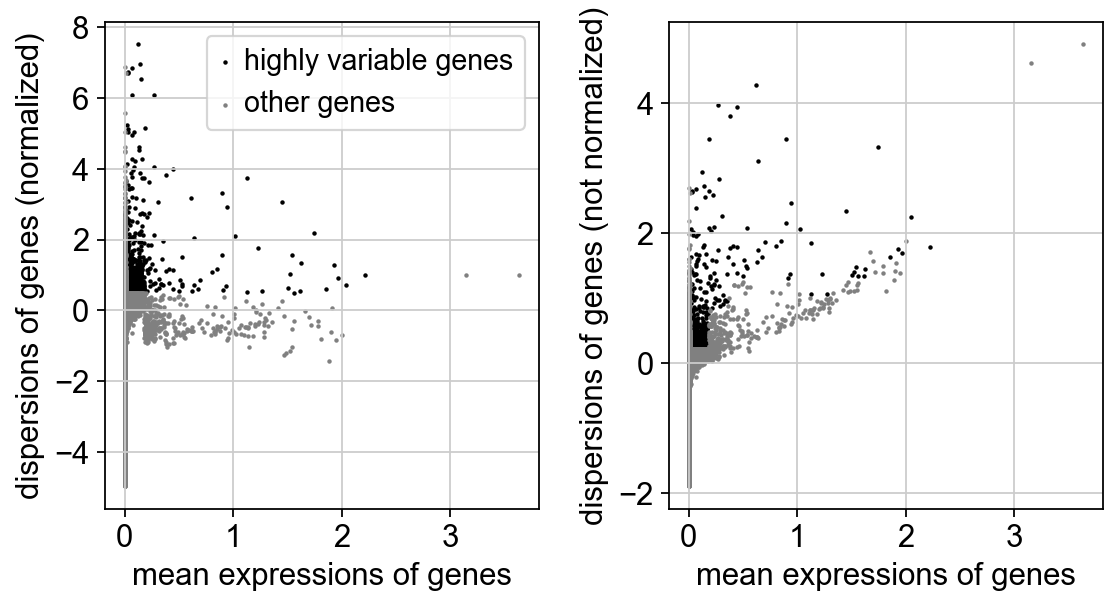

In [9]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
adata.raw = adata

In [10]:
sc.pp.regress_out(adata, ['total_counts','pct_counts_MT'])

# Got it from: https://github.com/theislab/single-cell-tutorial/issues/35
sc.pp.scale(adata, max_value=10)
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata) 

regressing out ['total_counts', 'pct_counts_MT']
    sparse input is densified and may lead to high memory use
    finished (0:05:05)
    ... clipping at max_value 10
computing PCA


c:\Python\Python310\lib\site-packages\scanpy\preprocessing\_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


    with n_comps=50
    finished (0:00:13)
    and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)
computing neighbors
    computing neighbors
    using 'X_pca' with n_pcs = 50
    computed neighbors (0:00:37)
    computed connectivities (0:00:03)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:40)
computing UMAP


  0%|          | 0/200 [00:00<?, ?it/s]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)


    ... clipping at max_value 10
computing PCA
    with n_comps=50
    finished (0:00:12)
    and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)
Memory usage: current 5.45 GB, difference +5.45 GB
computing neighbors
        initialized `.distances` `.connectivities` 
    computing neighbors
    using 'X_pca' with n_pcs = 50
    computed neighbors (0:00:04)
    computed connectivities (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


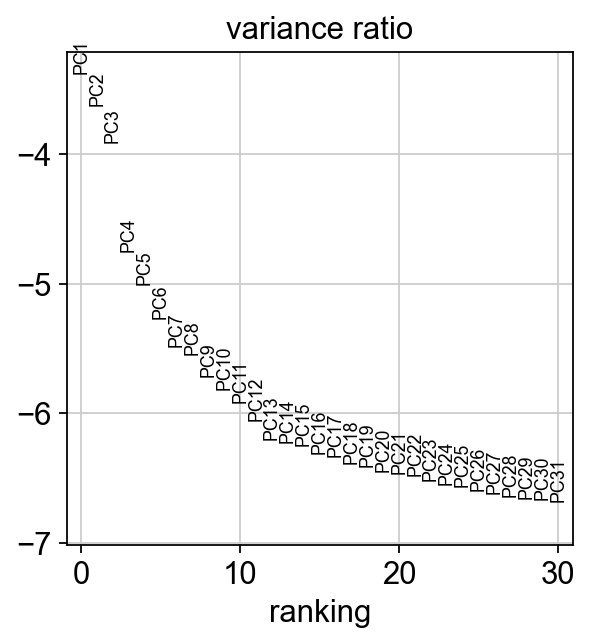

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP


  0%|          | 0/200 [00:00<?, ?it/s]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)
running Leiden clustering


C:\Users\TzachiHNB2\AppData\Local\Temp\ipykernel_19252\2800874316.py:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=reso)


    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


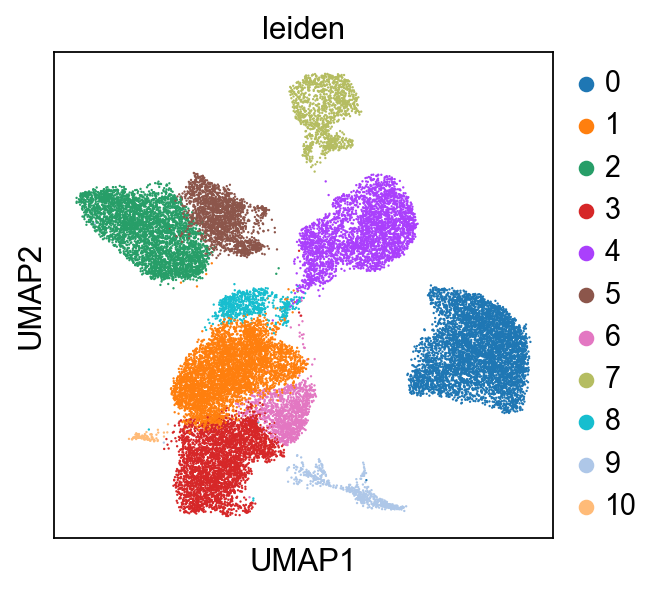

In [11]:
processing_batch(adata, key='treatment') 

In [12]:
adata.obs['treatment'].value_counts()

treatment
LPS     9592
PIC     6272
UNST    5361
LF      5350
Name: count, dtype: int64

In [13]:
adata.obs['treatment'] = adata.obs['treatment'].map({'UNST': 'control','LPS': 'lps', 'PIC': 'pic', 'LF':'lf'})

In [14]:
adata.obs

orig.ident  nCount_RNA  nFeature_RNA treatment  \
AAACCCACAAGGGCAT-1-UNST_1  MyProject       828.0           458   control   
AAACCCACAGACCAAG-1-UNST_1  MyProject       438.0           316   control   
AAACGAAGTGAATTAG-1-UNST_1  MyProject       466.0           327   control   
AAACGAATCTCAATCT-1-UNST_1  MyProject       428.0           304   control   
AAACGCTGTAGGCTGA-1-UNST_1  MyProject       715.0           440   control   
...                              ...         ...           ...       ...   
TTTGGTTTCCATCAGA-1-PIC_2   MyProject      2555.0           985       pic   
TTTGGTTTCGTCGATA-1-PIC_2   MyProject       939.0           473       pic   
TTTGTTGAGCGAAACC-1-PIC_2   MyProject      3380.0          1004       pic   
TTTGTTGCACGAAAGC-1-PIC_2   MyProject      1458.0           761       pic   
TTTGTTGGTATGGAAT-1-PIC_2   MyProject       662.0           384       pic   

                           n_genes  n_genes_by_counts  total_counts  \
AAACCCACAAGGGCAT-1-UNST_1      458                458         828.0   
AAACCCACAGACCAAG-1-UNST_1      316                316         438.0   
AAACGAAGTGAATTAG-1-UNST_1      327                327         466.0   
AAACGAATCTCAATCT-1-UNST_1      304                304         428.0   
AAACGCTGTAGGCTGA-1-UNST_1      440                440         715.0   
...                            ...                ...           ...   
TTTGGTTTCCATCAGA-1-PIC_2       985                985        2555.0   
TTTGGTTTCGTCGATA-1-PIC_2       473                473         939.0   
TTTGTTGAGCGAAACC-1-PIC_2      1004               1004        3380.0   
TTTGTTGCACGAAAGC-1-PIC_2       761                761        1458.0   
TTTGTTGGTATGGAAT-1-PIC_2       384                384         662.0   

                           total_counts_MT  pct_counts_MT   S_score  \
AAACCCACAAGGGCAT-1-UNST_1              0.0            0.0  0.009243   
AAACCCACAGACCAAG-1-UNST_1              0.0            0.0 -0.263388   
AAACGAAGTGAATTAG-1-UNST_1              0.0            0.0 -0.067388   
AAACGAATCTCAATCT-1-UNST_1              0.0            0.0 -0.060092   
AAACGCTGTAGGCTGA-1-UNST_1              0.0            0.0 -0.109562   
...                                    ...            ...       ...   
TTTGGTTTCCATCAGA-1-PIC_2               0.0            0.0 -0.092155   
TTTGGTTTCGTCGATA-1-PIC_2               0.0            0.0  0.000514   
TTTGTTGAGCGAAACC-1-PIC_2               0.0            0.0 -0.159136   
TTTGTTGCACGAAAGC-1-PIC_2               0.0            0.0 -0.165921   
TTTGTTGGTATGGAAT-1-PIC_2               0.0            0.0 -0.126132   

                           G2M_score phase   sample cca_clusters  \
AAACCCACAAGGGCAT-1-UNST_1   0.066585   G2M  turtle1            3   
AAACCCACAGACCAAG-1-UNST_1  -0.108363    G1  turtle1            8   
AAACGAAGTGAATTAG-1-UNST_1  -0.067509    G1  turtle1            5   
AAACGAATCTCAATCT-1-UNST_1   0.015213   G2M  turtle1            1   
AAACGCTGTAGGCTGA-1-UNST_1  -0.000623    G1  turtle1            2   
...                              ...   ...      ...          ...   
TTTGGTTTCCATCAGA-1-PIC_2    0.061184   G2M   turtl3            0   
TTTGGTTTCGTCGATA-1-PIC_2   -0.061481     S   turtl3            0   
TTTGTTGAGCGAAACC-1-PIC_2    0.002162   G2M   turtl3            3   
TTTGTTGCACGAAAGC-1-PIC_2   -0.054590    G1   turtl3            0   
TTTGTTGGTATGGAAT-1-PIC_2   -0.112189    G1   turtl3            5   

                          seurat_clusters ident leiden  
AAACCCACAAGGGCAT-1-UNST_1               3     3      1  
AAACCCACAGACCAAG-1-UNST_1               8     8      9  
AAACGAAGTGAATTAG-1-UNST_1               5     5      2  
AAACGAATCTCAATCT-1-UNST_1               1     1      2  
AAACGCTGTAGGCTGA-1-UNST_1               2     2      3  
...                                   ...   ...    ...  
TTTGGTTTCCATCAGA-1-PIC_2                0     0      0  
TTTGGTTTCGTCGATA-1-PIC_2                0     0      0  
TTTGTTGAGCGAAACC-1-PIC_2                3     3      1  
TTTGTTGCACGAAAGC-1-P

## UMAP's

### T cells

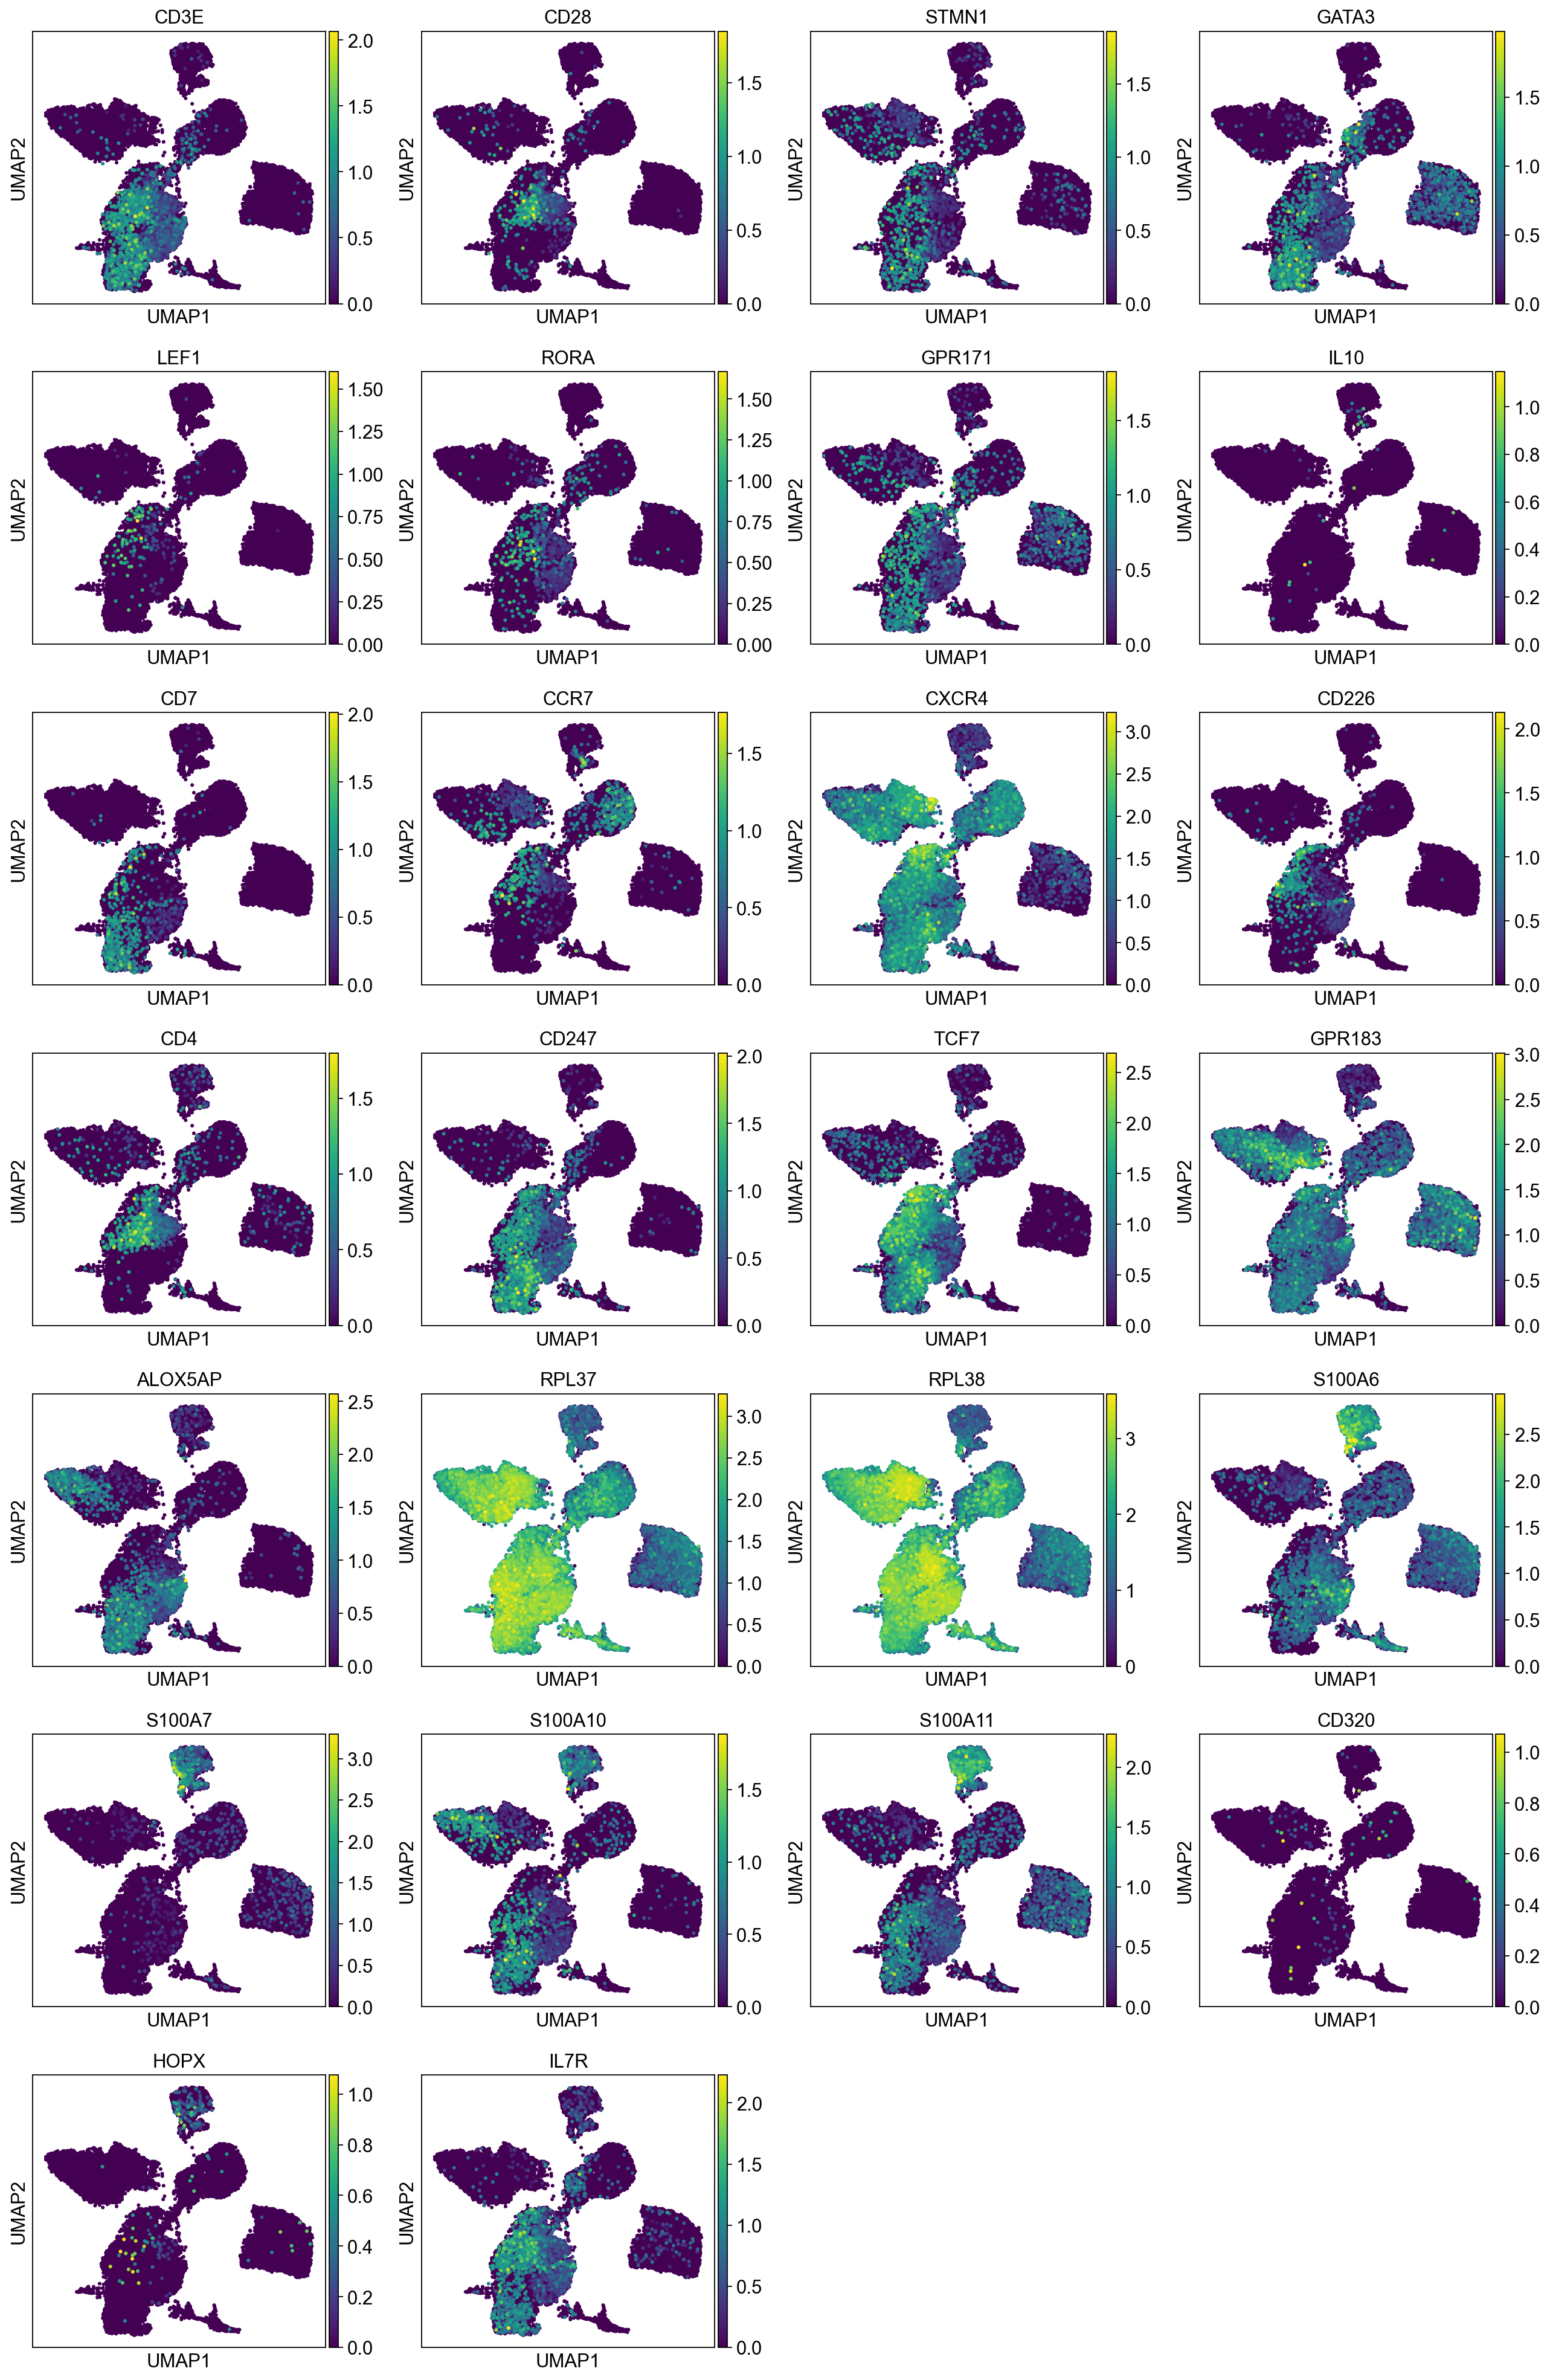

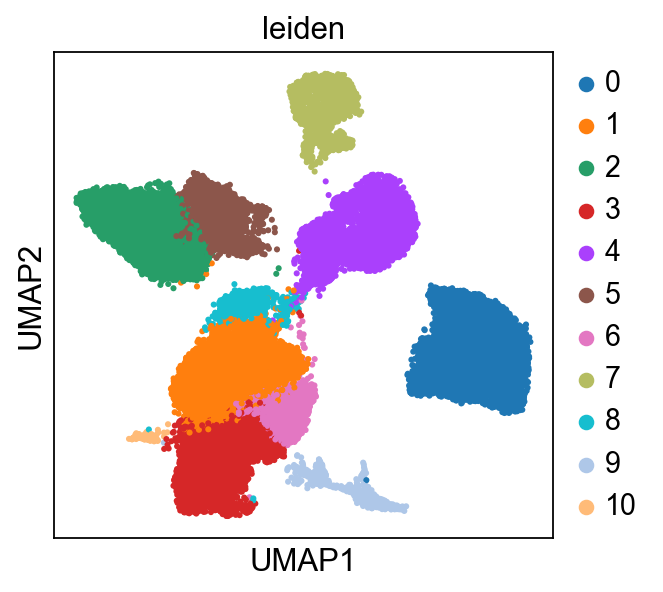

In [64]:
sc.pl.umap(adata, color=['CD3E','CD28','STMN1','GATA3','LEF1','RORA','GPR171',
                         'IL10', 'CD7', 'CCR7','CXCR4','CD226','CD4','CD247',
                         'TCF7','GPR183','ALOX5AP','RPL37','RPL38','S100A6',
                         'S100A7','S100A10','S100A11','CD320','HOPX','IL7R'], size=30)
sc.pl.umap(adata, color='leiden', size=30)

### B cells

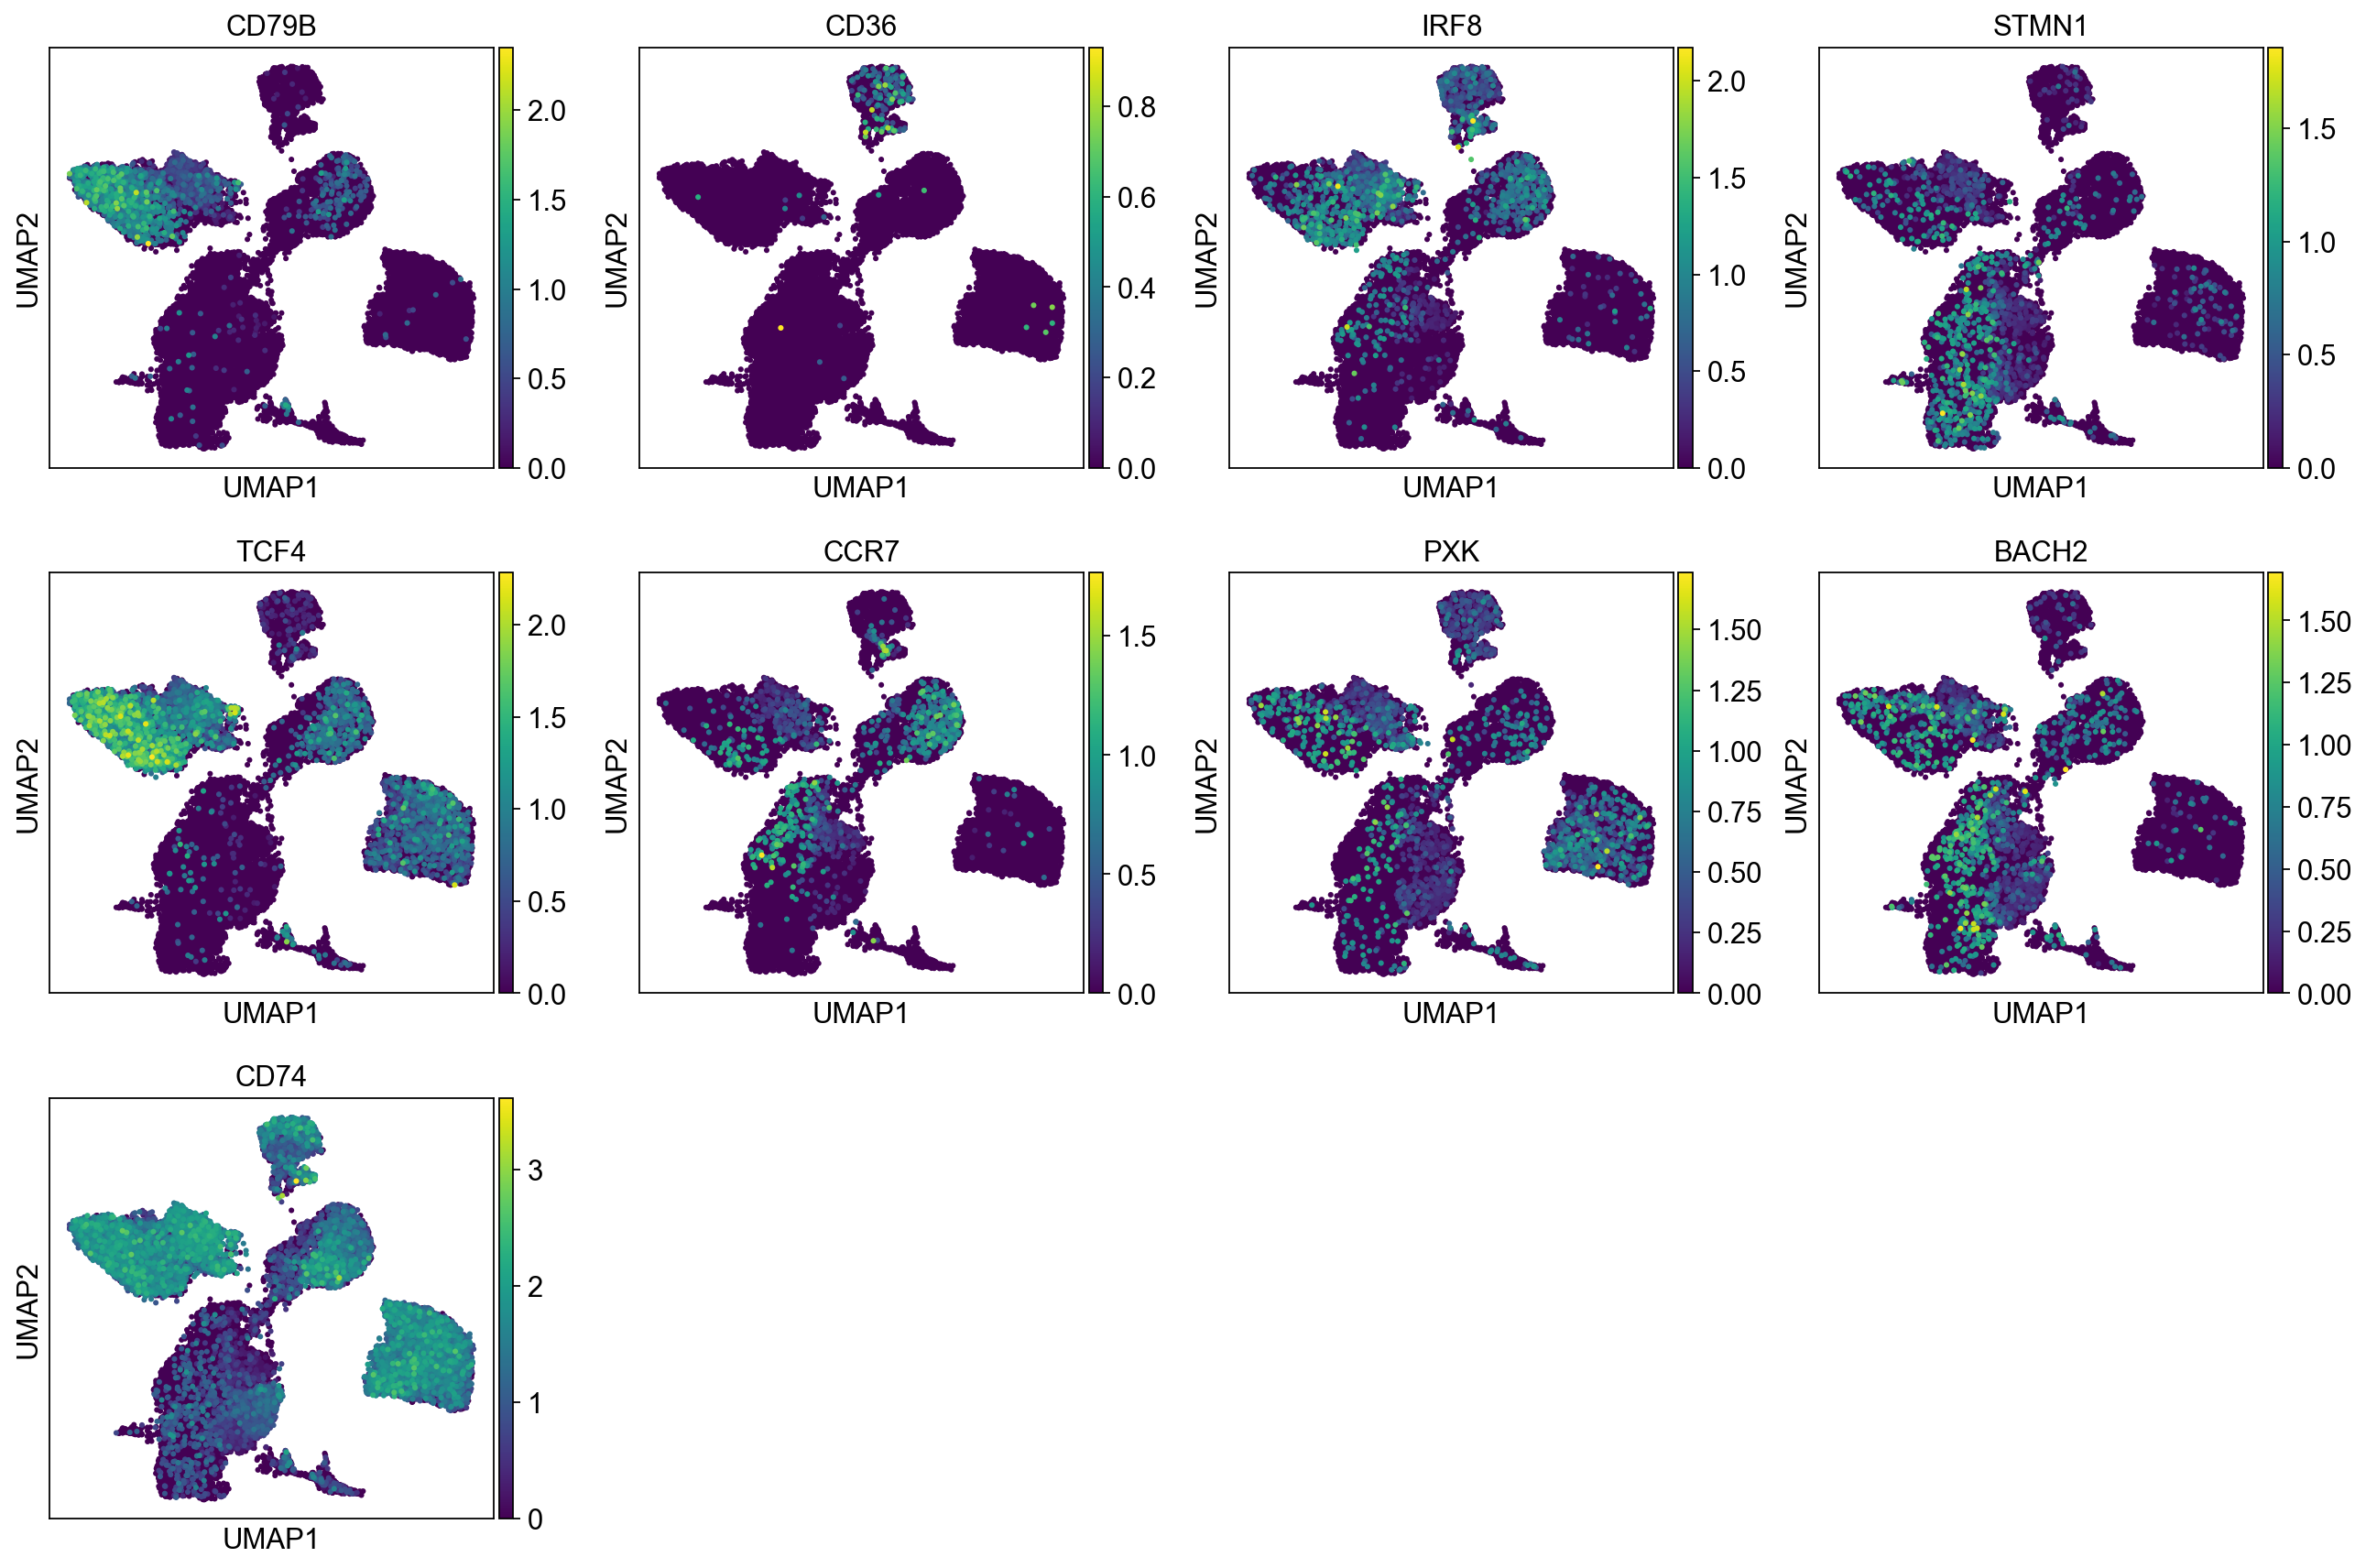

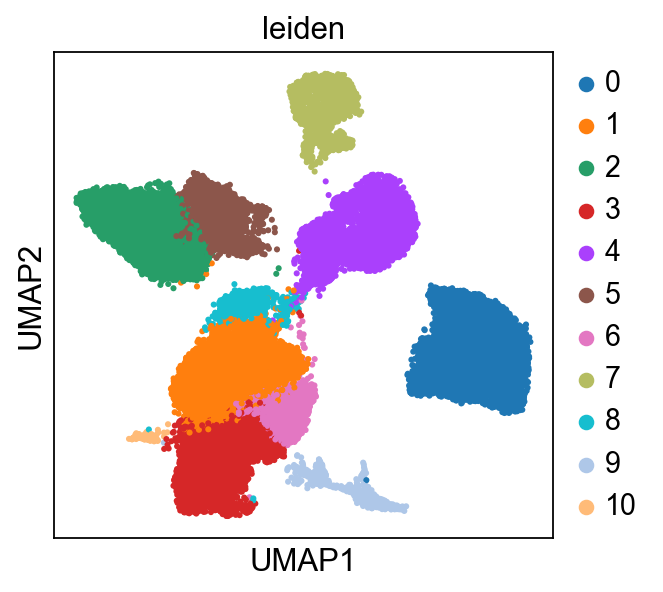

In [40]:
sc.pl.umap(adata, color=['CD79B', 'CD36', 'IRF8', 'STMN1','TCF4',
                         'CCR7', 'PXK', 'BACH2','CD74'], size=30) # B_cells. 'JCHAIN'

sc.pl.umap(adata, color='leiden', size=30)
# celltype = {'0':'0','1':'T_cells','2':'2','3':'3','4':'T_cells','5':'RBC','6':'6'}
# adata.obs['cell_type'] = adata.obs.leiden.map(celltype).astype('category')
# sc.pl.umap(adata, color='cell_type', size=20)

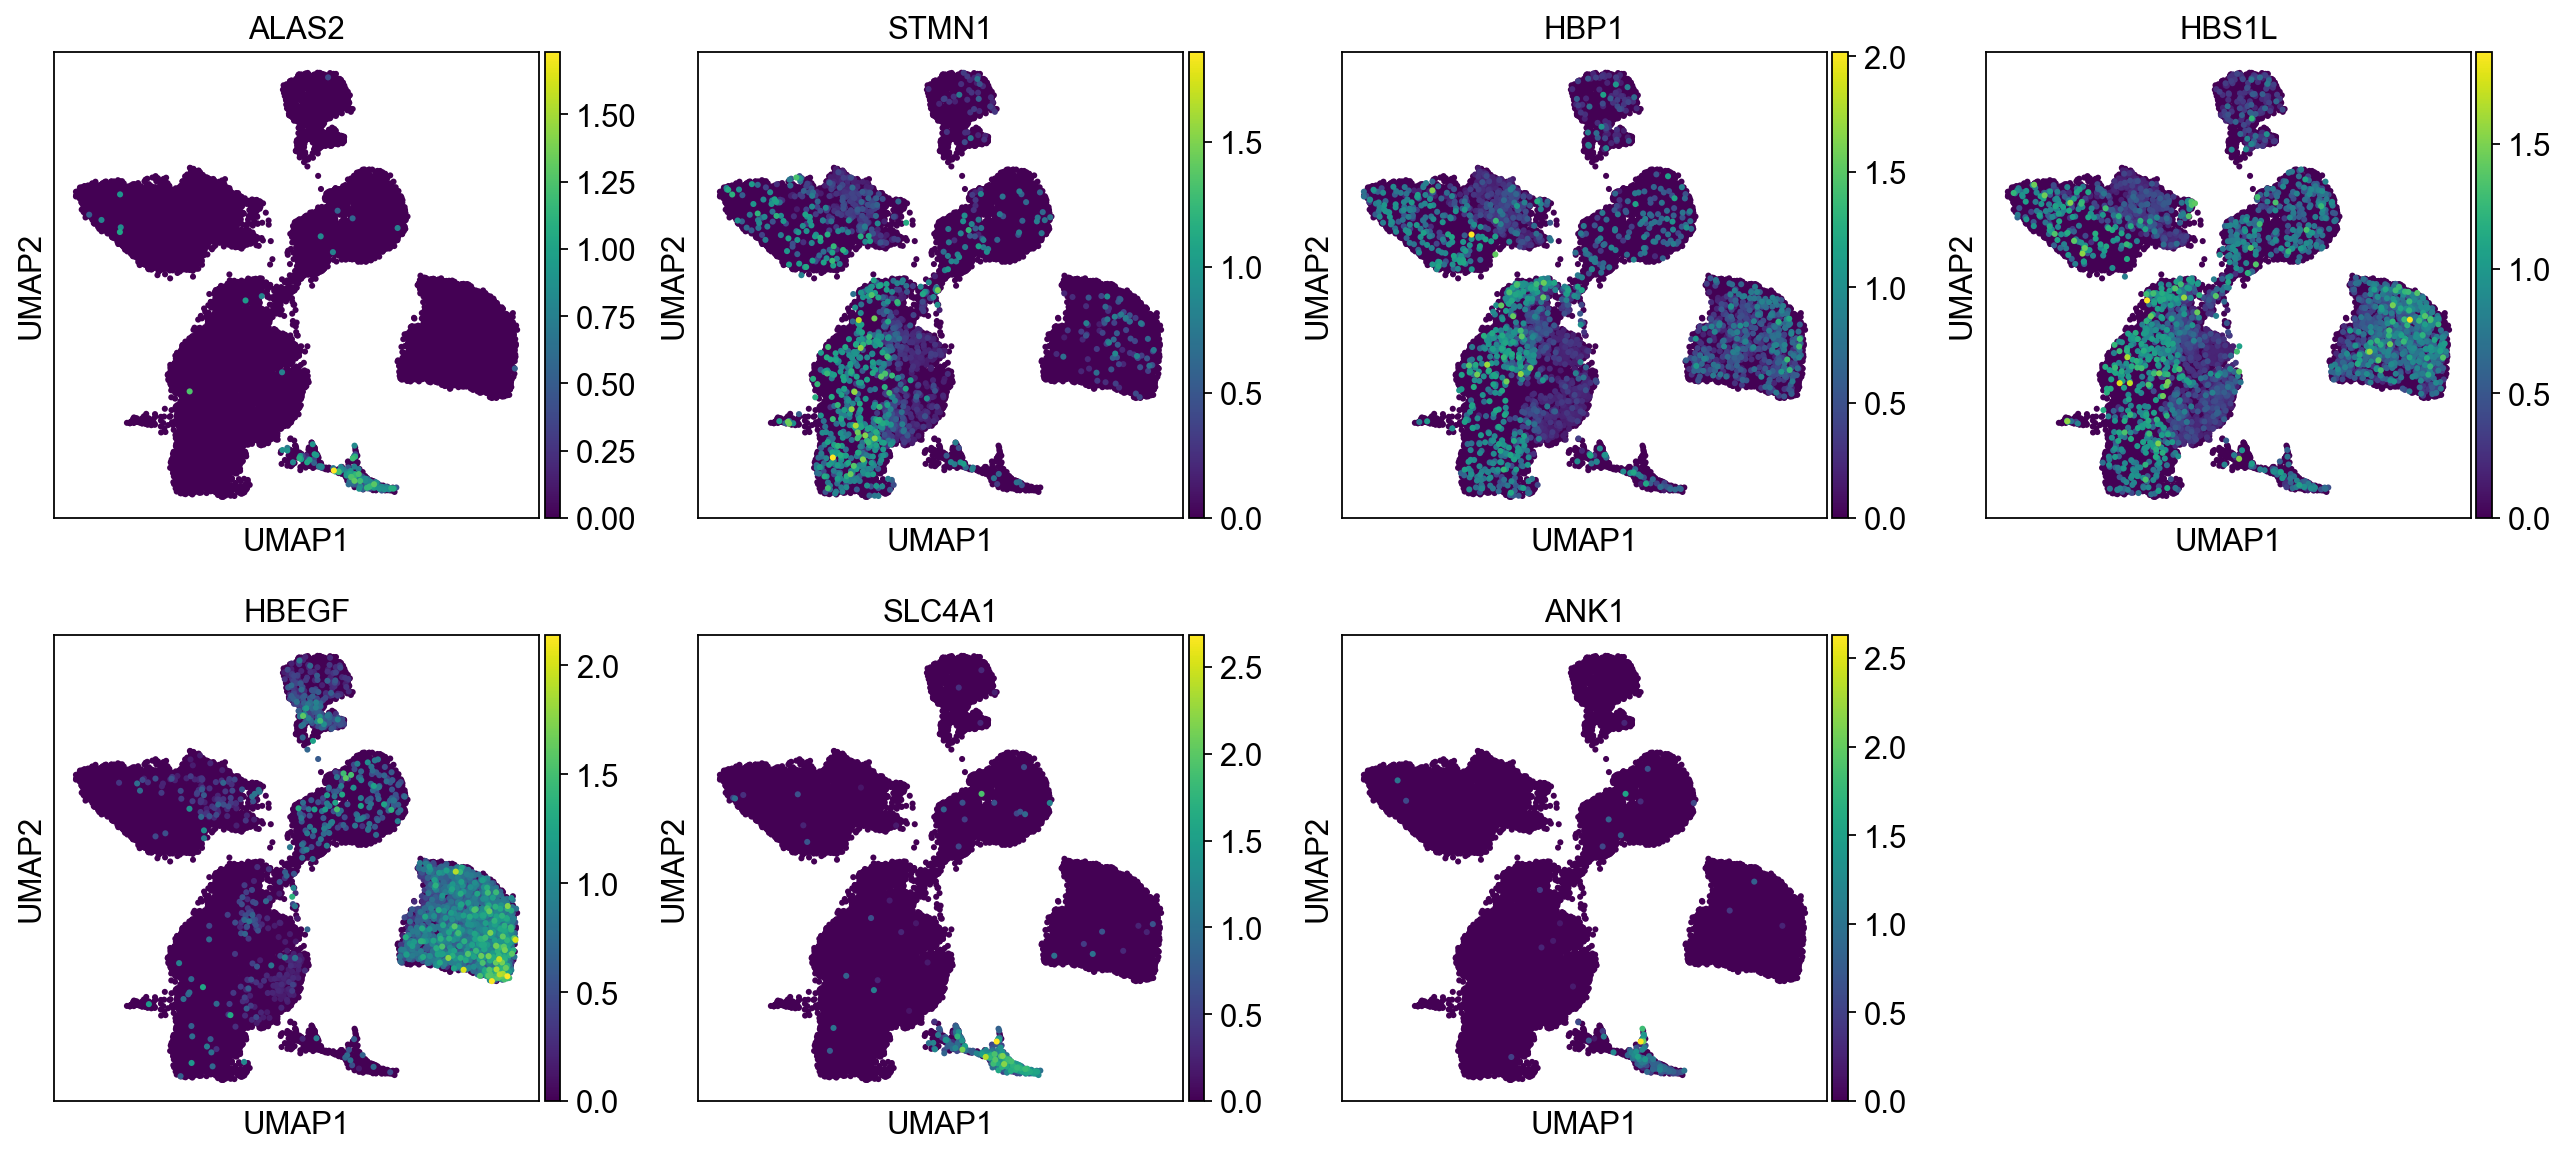

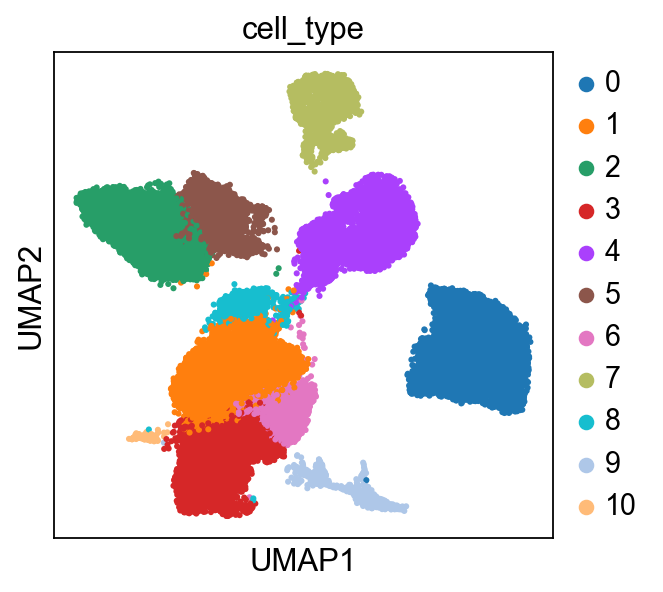

In [44]:
sc.pl.umap(adata, color=['ALAS2','STMN1','HBP1','HBS1L','HBEGF','SLC4A1','ANK1'], size=30) 

celltype = {'0':'0','1':'1','2':'2','3':'3','4':'4','5':'5','6':'6','7':'7','8':'8','9':'9','10':'10'}
adata.obs['cell_type'] = adata.obs.leiden.map(celltype).astype('category')
sc.pl.umap(adata, color='cell_type', size=30)

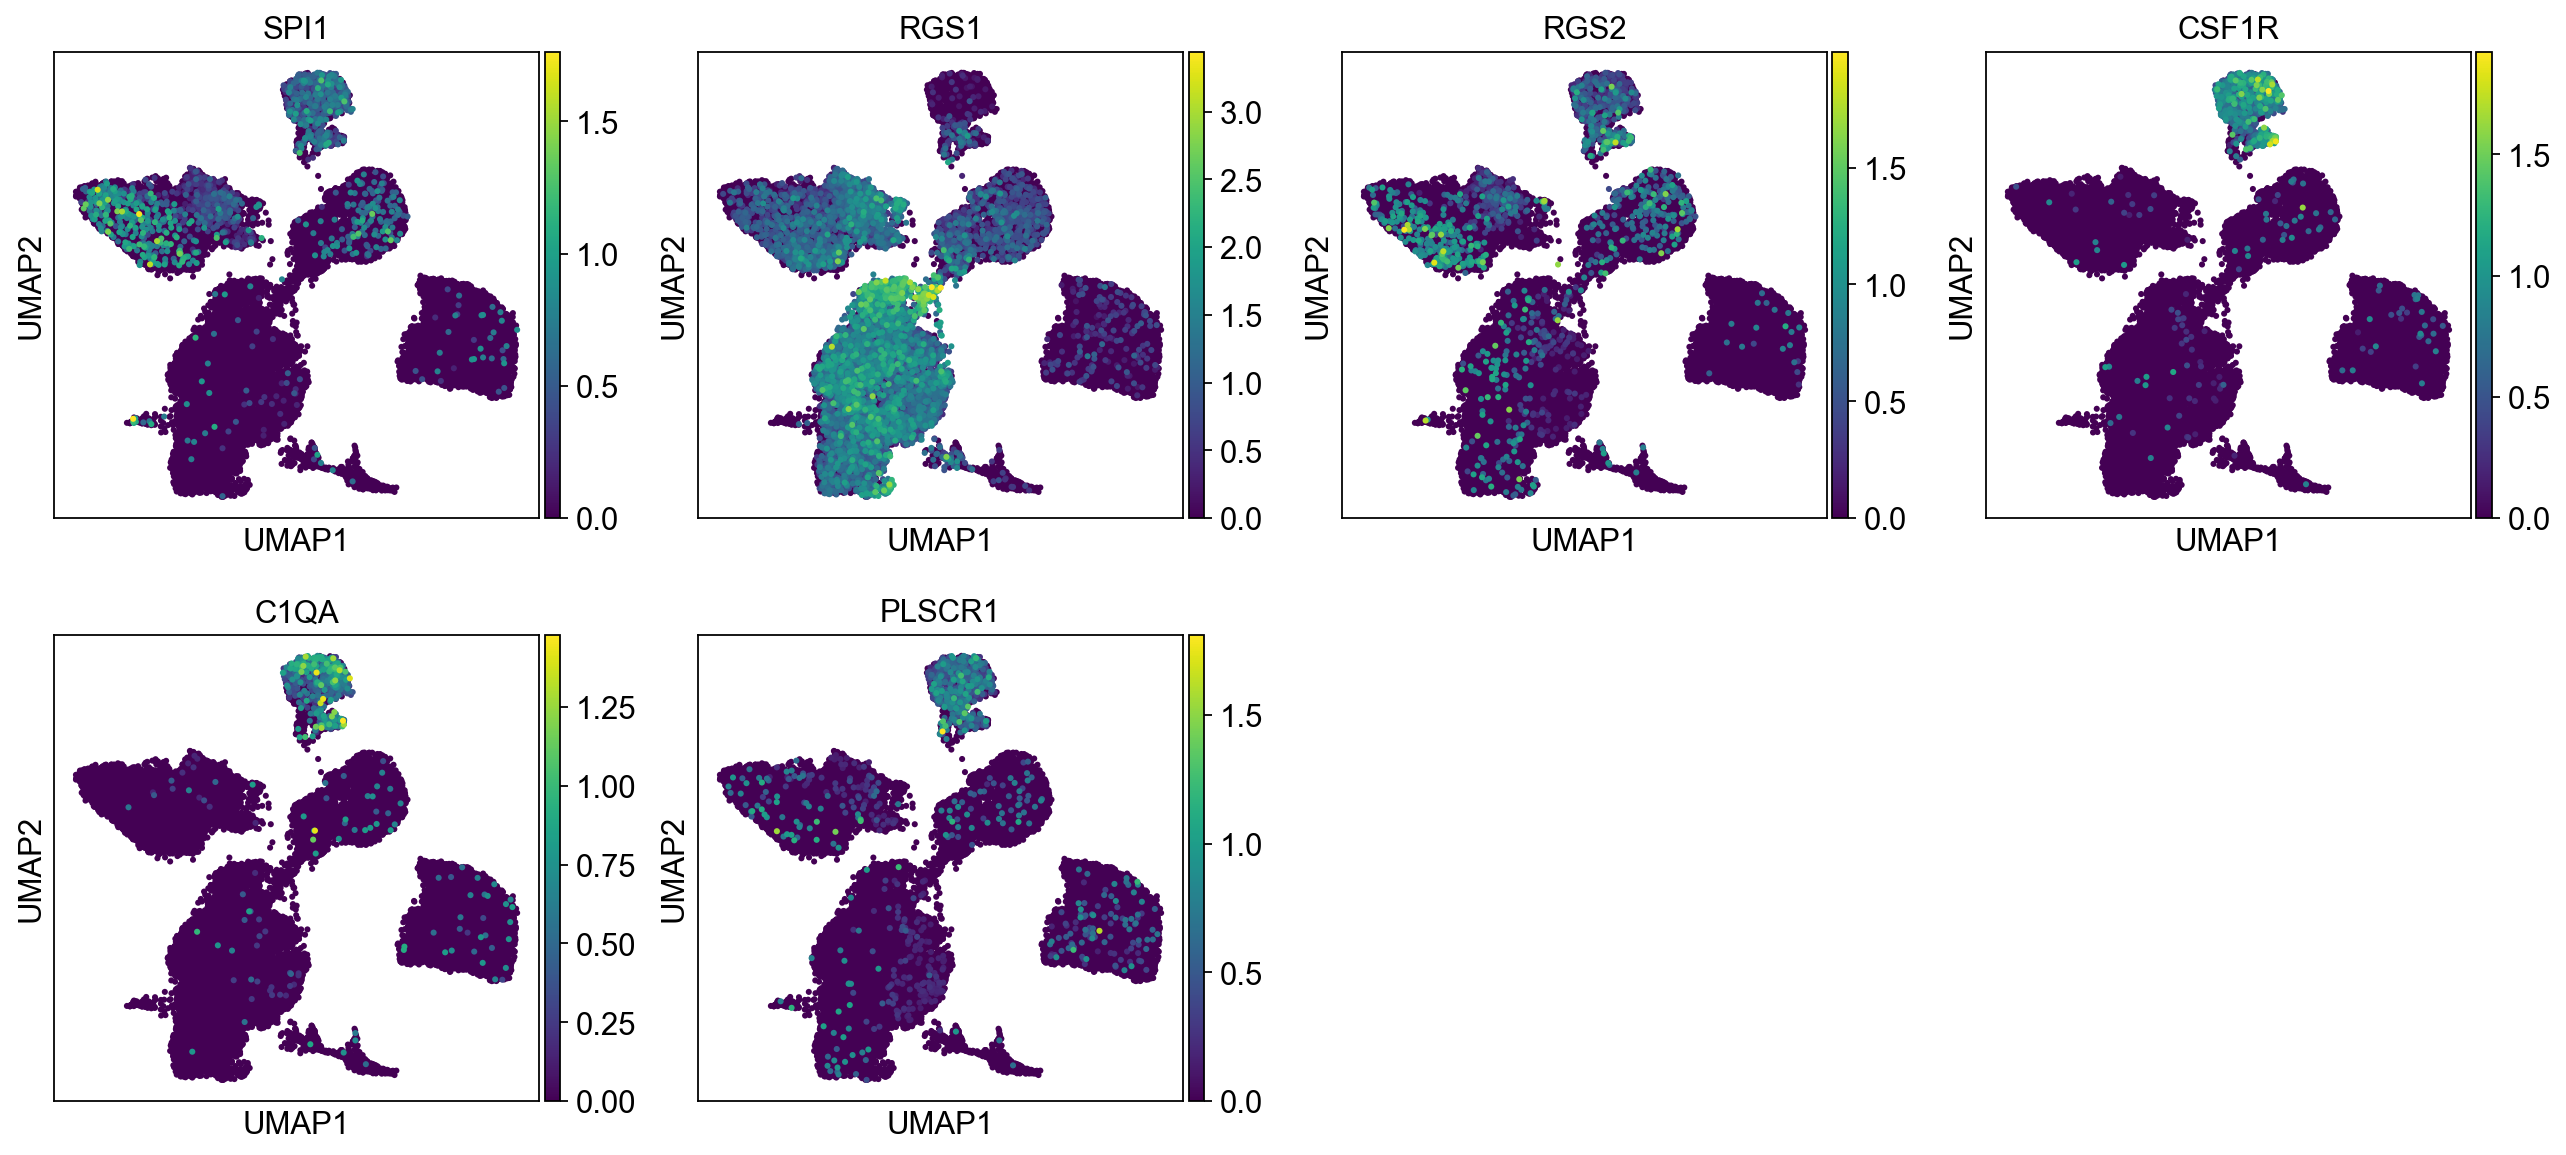

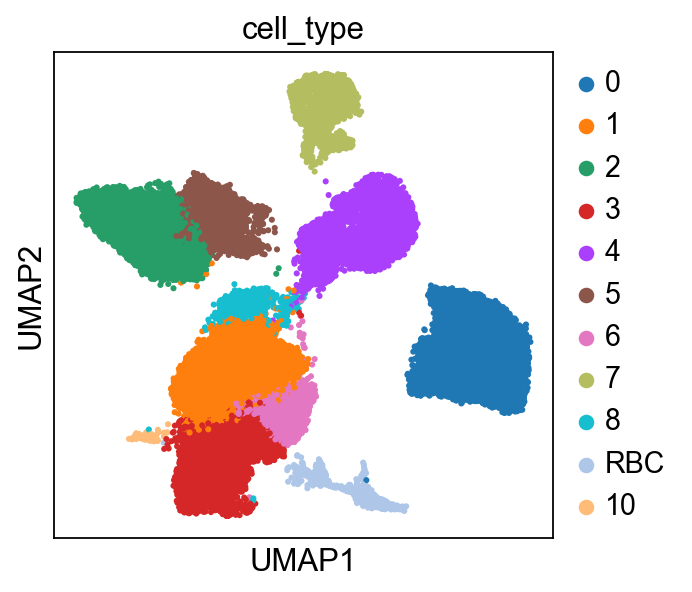

In [57]:
sc.pl.umap(adata, color=['SPI1','RGS1','RGS2','CSF1R','C1QA','PLSCR1'], size=30)

celltype = {'0':'0','1':'1','2':'2','3':'3','4':'4','5':'5','6':'6','7':'7','8':'8','9':'RBC','10':'10'}
adata.obs['cell_type'] = adata.obs.leiden.map(celltype).astype('category')
sc.pl.umap(adata, color='cell_type', size=30)

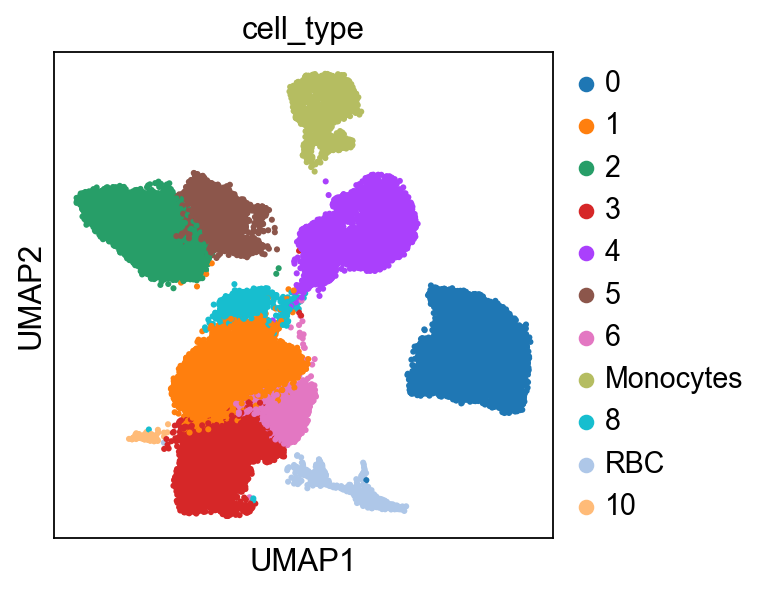

In [58]:
celltype = {'0':'0','1':'1','2':'2','3':'3','4':'4','5':'5','6':'6','7':'Monocytes','8':'8','9':'RBC','10':'10'}
adata.obs['cell_type'] = adata.obs.leiden.map(celltype).astype('category')
sc.pl.umap(adata, color='cell_type', size=30)

## Gene search tools
This function returns a list of genes that are present in adata (markers for example) from an input of a general list.

In [63]:
def find_gene(gene):
    GENES = list(adata.raw.var.index[adata.raw.var.index.str.startswith(gene.upper())])
    return GENES

find_gene('IL7R')

['IL7R']